In [7]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import  preprocess_input

In [ ]:
train_path = "Cervical Cancer Balanced Data/train"
test_path = "Cervical Cancer Balanced Data/val"

In [ ]:
IMAGE_SIZE = [128,128]

In [ ]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=2,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128,128),
                                            batch_size=2,
                                            class_mode='categorical')

Found 7659 images belonging to 3 classes.
Found 2411 images belonging to 3 classes.


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.3, min_lr=0.0000001
)
early_stop = EarlyStopping(
    patience=10,
    verbose=1,
    monitor="val_accuracy",
    mode="max",
    min_delta=0.001,
    restore_best_weights=True,
)

# EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
base = EfficientNetB0(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(3, activation='softmax')(x)
# Combining base and head
model1 = Model(inputs=base.input, outputs=head)

In [ ]:
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy",f1_m,precision_m, recall_m])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 128, 128, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 129, 129, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [ ]:
hist1 = model1.fit(train_set, validation_data=test_set, epochs=20,
                   steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
3830/3830 [==============================] - 260s 66ms/step - loss: 1.0203 - accuracy: 0.4690 - f1_m: 0.3272 - precision_m: 0.4060 - recall_m: 0.2877 - val_loss: 1.0920 - val_accuracy: 0.3530 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
3830/3830 [==============================] - 251s 65ms/step - loss: 0.9112 - accuracy: 0.5524 - f1_m: 0.4550 - precision_m: 0.5427 - recall_m: 0.4111 - val_loss: 1.3069 - val_accuracy: 0.3700 - val_f1_m: 0.3698 - val_precision_m: 0.3706 - val_recall_m: 0.3694
Epoch 3/20
3830/3830 [==============================] - 251s 66ms/step - loss: 0.8399 - accuracy: 0.5939 - f1_m: 0.5347 - precision_m: 0.6020 - recall_m: 0.5010 - val_loss: 1.1674 - val_accuracy: 0.3708 - val_f1_m: 0.0196 - val_precision_m: 0.0290 - val_recall_m: 0.0149
Epoch 4/20
3830/3830 [==============================] - 252s 66ms/step - loss: 0.7924 - accuracy: 0.6148 - f1_m: 0.5759 - precision_m: 0.6312 - recall_m: 0.5483 - val_loss: 1.

In [ ]:
dl_acc = hist1.history["accuracy"][19]
dl_prec = hist1.history["precision_m"][19]
dl_rec = hist1.history["recall_m"][19]
dl_f1 = hist1.history["f1_m"][19]

storeResults('EfficientNetB0',dl_acc,dl_prec,dl_rec,dl_f1)

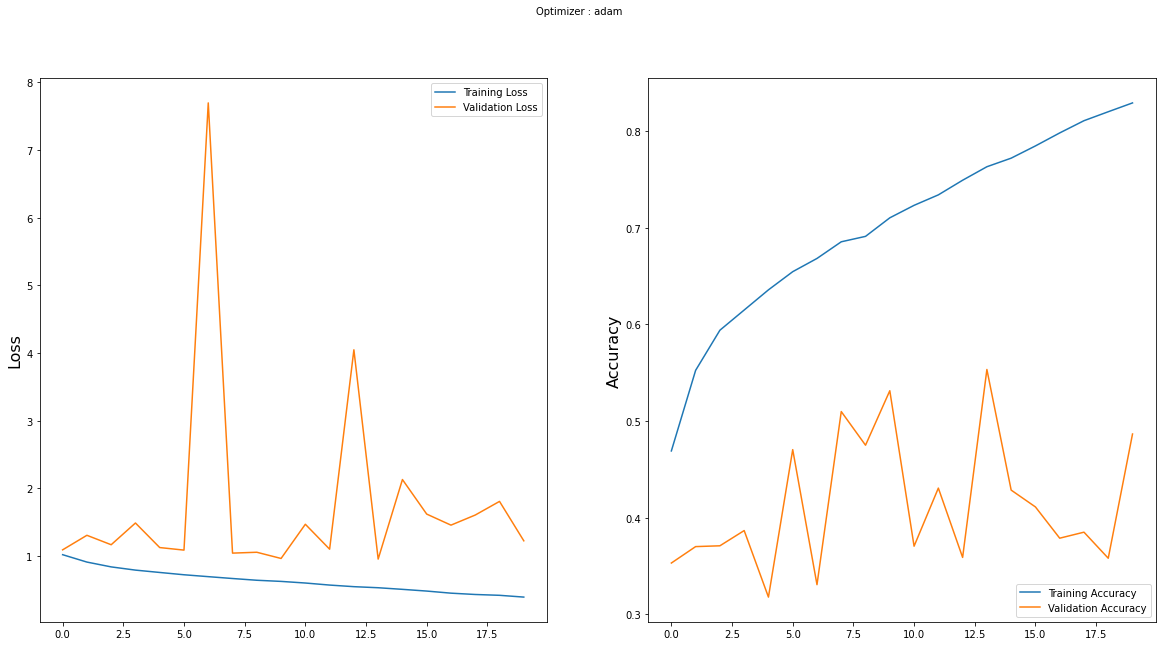

In [ ]:
import matplotlib.pyplot as plt

x=hist1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16=VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(vgg16.output)
prediction1 = Dense(3, activation='softmax')(x1)
model2 = Model(inputs = vgg16.inputs, outputs = prediction1)
model2.summary()
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy",f1_m,precision_m, recall_m])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
hist2 = model2.fit(train_set, validation_data=test_set, epochs=20,
                   steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
3830/3830 [==============================] - 60s 15ms/step - loss: 1.2159 - accuracy: 0.3438 - f1_m: 0.0092 - precision_m: 0.0095 - recall_m: 0.0090 - val_loss: 1.0985 - val_accuracy: 0.3353 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
3830/3830 [==============================] - 58s 15ms/step - loss: 1.0985 - accuracy: 0.3382 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.0983 - val_accuracy: 0.3446 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/20
3830/3830 [==============================] - 58s 15ms/step - loss: 1.0985 - accuracy: 0.3438 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.0982 - val_accuracy: 0.3446 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/20
3830/3830 [==============================] - 57s 15ms/step - loss: 1.0985 - accuracy: 0.3382 - f1_m: 0.0000e+00 - preci

In [ ]:
dl_acc = hist2.history["accuracy"][19]
dl_prec = hist2.history["precision_m"][19]
dl_rec = hist2.history["recall_m"][19]
dl_f1 = hist2.history["f1_m"][19]

storeResults('VGG16',dl_acc,dl_prec,dl_rec,dl_f1)

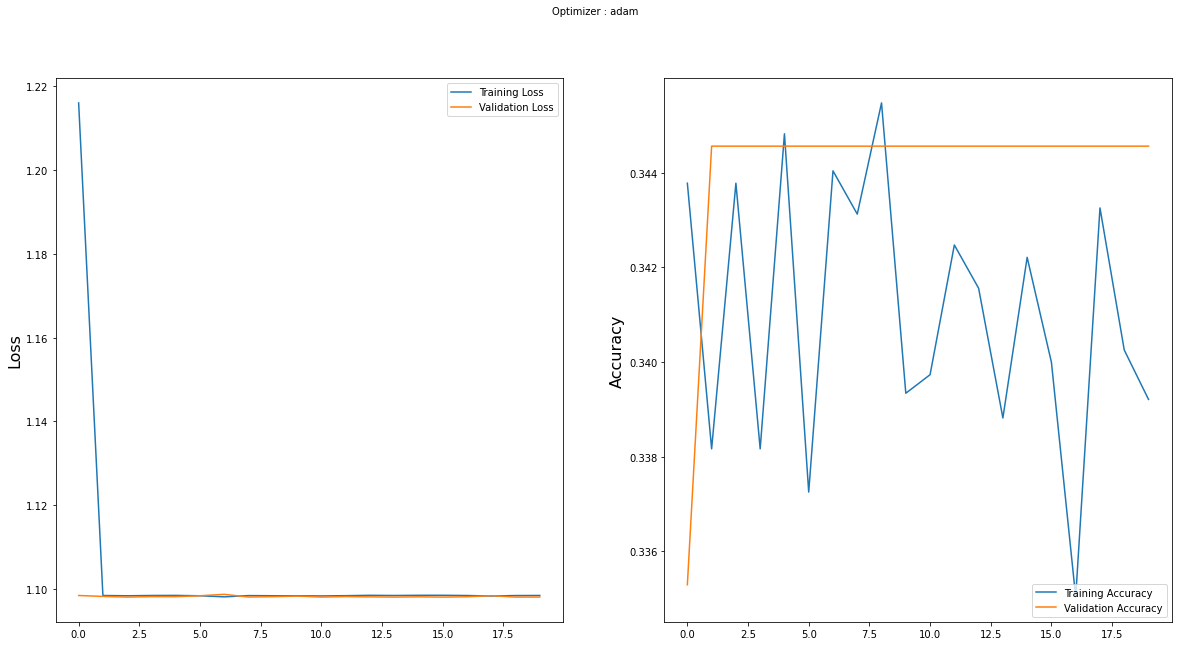

In [ ]:
import matplotlib.pyplot as plt

x=hist2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

res101V2=ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(res101V2.output)
prediction1 = Dense(3, activation='softmax')(x1)
model3 = Model(inputs = res101V2.inputs, outputs = prediction1)
model3.summary()
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy",f1_m,precision_m, recall_m])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
hist3 = model3.fit(train_set, validation_data=test_set, epochs=20,
                   steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
3830/3830 [==============================] - 195s 50ms/step - loss: 1.6383 - accuracy: 0.3524 - f1_m: 0.1935 - precision_m: 0.2627 - recall_m: 0.1589 - val_loss: 13.3851 - val_accuracy: 0.3435 - val_f1_m: 0.3332 - val_precision_m: 0.3435 - val_recall_m: 0.3281
Epoch 2/20
3830/3830 [==============================] - 192s 50ms/step - loss: 1.1039 - accuracy: 0.4138 - f1_m: 0.1719 - precision_m: 0.2379 - recall_m: 0.1389 - val_loss: 1.3687 - val_accuracy: 0.4097 - val_f1_m: 0.3395 - val_precision_m: 0.3879 - val_recall_m: 0.3153
Epoch 3/20
3830/3830 [==============================] - 188s 49ms/step - loss: 1.0656 - accuracy: 0.4186 - f1_m: 0.1455 - precision_m: 0.2027 - recall_m: 0.1168 - val_loss: 1.2435 - val_accuracy: 0.4363 - val_f1_m: 0.2785 - val_precision_m: 0.3604 - val_recall_m: 0.2375
Epoch 4/20
3830/3830 [==============================] - 188s 49ms/step - loss: 1.1433 - accuracy: 0.4213 - f1_m: 0.2085 - precision_m: 0.2826 - recall_m: 0.1714 - val_loss: 1.0231 - val_

In [ ]:
dl_acc = hist3.history["accuracy"][19]
dl_prec = hist3.history["precision_m"][19]
dl_rec = hist3.history["recall_m"][19]
dl_f1 = hist3.history["f1_m"][19]

storeResults('ResNet50',dl_acc,dl_prec,dl_rec,dl_f1)

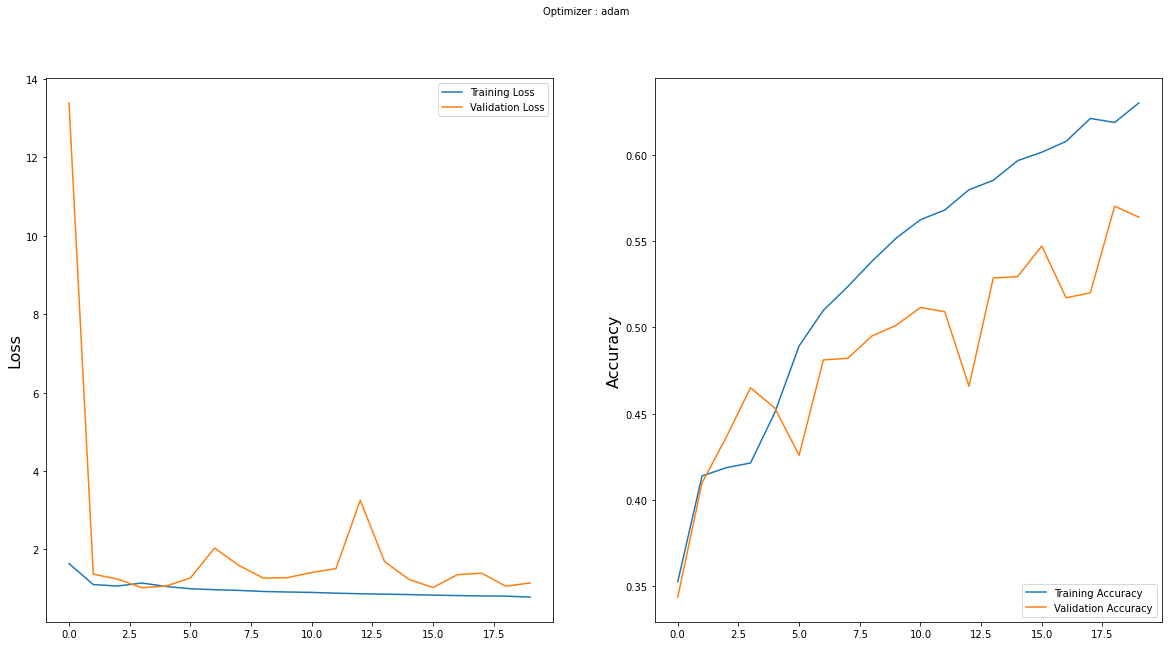

In [ ]:
import matplotlib.pyplot as plt

x=hist3
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
vgg16=VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(vgg16.output)
prediction1 = Dense(3, activation='softmax')(x1)
model4 = Model(inputs = vgg16.inputs, outputs = prediction1)
model4.summary()
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy",f1_m,precision_m, recall_m])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
hist4 = model4.fit(train_set, validation_data=test_set, epochs=20,
                   steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
3830/3830 [==============================] - 64s 17ms/step - loss: 1.4737 - accuracy: 0.3416 - f1_m: 0.0033 - precision_m: 0.0035 - recall_m: 0.0031 - val_loss: 1.0982 - val_accuracy: 0.3446 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
3830/3830 [==============================] - 63s 16ms/step - loss: 1.0986 - accuracy: 0.3423 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.0982 - val_accuracy: 0.3446 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/20
3830/3830 [==============================] - 64s 17ms/step - loss: 1.0985 - accuracy: 0.3399 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.0983 - val_accuracy: 0.3446 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/20
3830/3830 [==============================] - 63s 16ms/step - loss: 1.0985 - accuracy: 0.3416 - f1_m: 0.0000e+00 - preci

In [ ]:
dl_acc = hist4.history["accuracy"][19]
dl_prec = hist4.history["precision_m"][19]
dl_rec = hist4.history["recall_m"][19]
dl_f1 = hist4.history["f1_m"][19]

storeResults('VGG19',dl_acc,dl_prec,dl_rec,dl_f1)

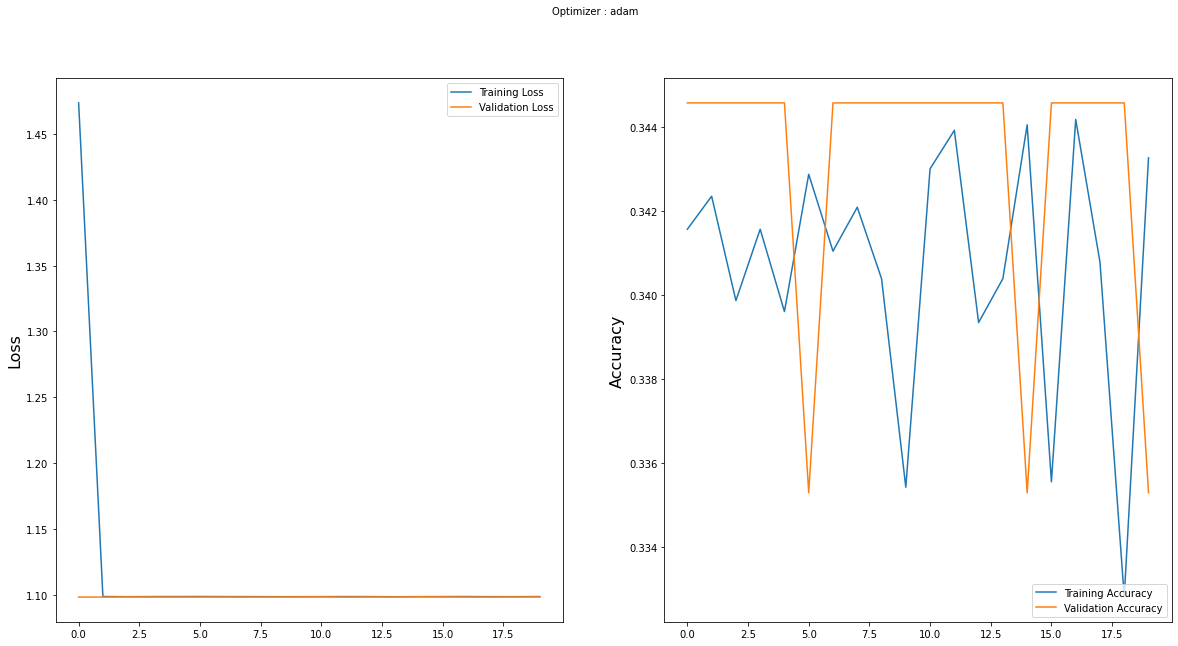

In [ ]:
import matplotlib.pyplot as plt

x=hist4
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# CYENET (CNN-Modified)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
model5 = Sequential()

model5.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (128, 128, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(strides=(2,2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(strides=(2,2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.25))

model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(3, activation='softmax'))

learning_rate = 0.001

model5.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate),
              metrics=['accuracy',f1_m,precision_m, recall_m])

model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        4

In [ ]:
hist5 = model5.fit(train_set, validation_data=test_set, epochs=20,
                   steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
3830/3830 [==============================] - 40s 10ms/step - loss: 2.6320 - accuracy: 0.3836 - f1_m: 0.2929 - precision_m: 0.3411 - recall_m: 0.2688 - val_loss: 1.2783 - val_accuracy: 0.3933 - val_f1_m: 0.2819 - val_precision_m: 0.3461 - val_recall_m: 0.2497
Epoch 2/20
3830/3830 [==============================] - 40s 10ms/step - loss: 1.1657 - accuracy: 0.3815 - f1_m: 0.1402 - precision_m: 0.1907 - recall_m: 0.1149 - val_loss: 1.0751 - val_accuracy: 0.3937 - val_f1_m: 0.0286 - val_precision_m: 0.0422 - val_recall_m: 0.0218
Epoch 3/20
3830/3830 [==============================] - 39s 10ms/step - loss: 1.1176 - accuracy: 0.3903 - f1_m: 0.1127 - precision_m: 0.1572 - recall_m: 0.0905 - val_loss: 1.0332 - val_accuracy: 0.4464 - val_f1_m: 0.1422 - val_precision_m: 0.1986 - val_recall_m: 0.1140
Epoch 4/20
3830/3830 [==============================] - 39s 10ms/step - loss: 1.0670 - accuracy: 0.4327 - f1_m: 0.1583 - precision_m: 0.2183 - recall_m: 0.1283 - val_loss: 1.0586 - val_accur

In [ ]:
dl_acc = hist5.history["accuracy"][19]
dl_prec = hist5.history["precision_m"][19]
dl_rec = hist5.history["recall_m"][19]
dl_f1 = hist5.history["f1_m"][19]

storeResults('CYENET (CNN-Modified)',dl_acc,dl_prec,dl_rec,dl_f1)

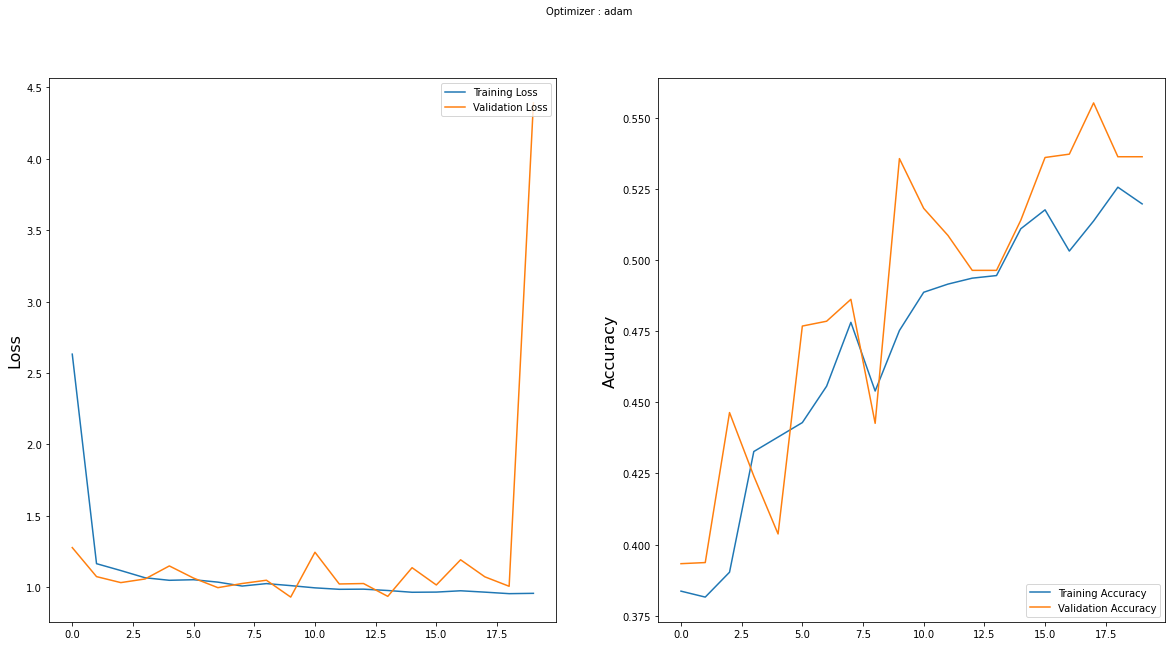

In [ ]:
import matplotlib.pyplot as plt

x=hist5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet169, DenseNet201

In [ ]:
des169=DenseNet169(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
x1= Flatten()(des169.output)
prediction1 = Dense(3, activation='softmax')(x1)
model6 = Model(inputs = des169.inputs, outputs = prediction1)
model6.summary()
model6.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy",f1_m,precision_m, recall_m])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
hist6 = model6.fit(train_set, validation_data=test_set, epochs=20,
                   steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
3830/3830 [==============================] - 340s 87ms/step - loss: 2.2644 - accuracy: 0.3716 - f1_m: 0.3134 - precision_m: 0.3490 - recall_m: 0.2957 - val_loss: 1.0635 - val_accuracy: 0.4326 - val_f1_m: 0.2342 - val_precision_m: 0.3132 - val_recall_m: 0.1946
Epoch 2/20
3830/3830 [==============================] - 332s 87ms/step - loss: 1.0626 - accuracy: 0.4344 - f1_m: 0.2185 - precision_m: 0.2954 - recall_m: 0.1800 - val_loss: 1.1005 - val_accuracy: 0.4519 - val_f1_m: 0.2531 - val_precision_m: 0.3338 - val_recall_m: 0.2128
Epoch 3/20
3830/3830 [==============================] - 333s 87ms/step - loss: 1.0351 - accuracy: 0.4454 - f1_m: 0.2309 - precision_m: 0.3103 - recall_m: 0.1911 - val_loss: 1.2028 - val_accuracy: 0.4793 - val_f1_m: 0.3769 - val_precision_m: 0.4503 - val_recall_m: 0.3402
Epoch 4/20
3830/3830 [==============================] - 332s 87ms/step - loss: 1.0106 - accuracy: 0.4792 - f1_m: 0.2920 - precision_m: 0.3829 - recall_m: 0.2466 - val_loss: 1.7661 - val_a

In [ ]:
dl_acc = hist6.history["accuracy"][19]
dl_prec = hist6.history["precision_m"][19]
dl_rec = hist6.history["recall_m"][19]
dl_f1 = hist56history["f1_m"][19]

storeResults('DenseNEt',dl_acc,dl_prec,dl_rec,dl_f1)

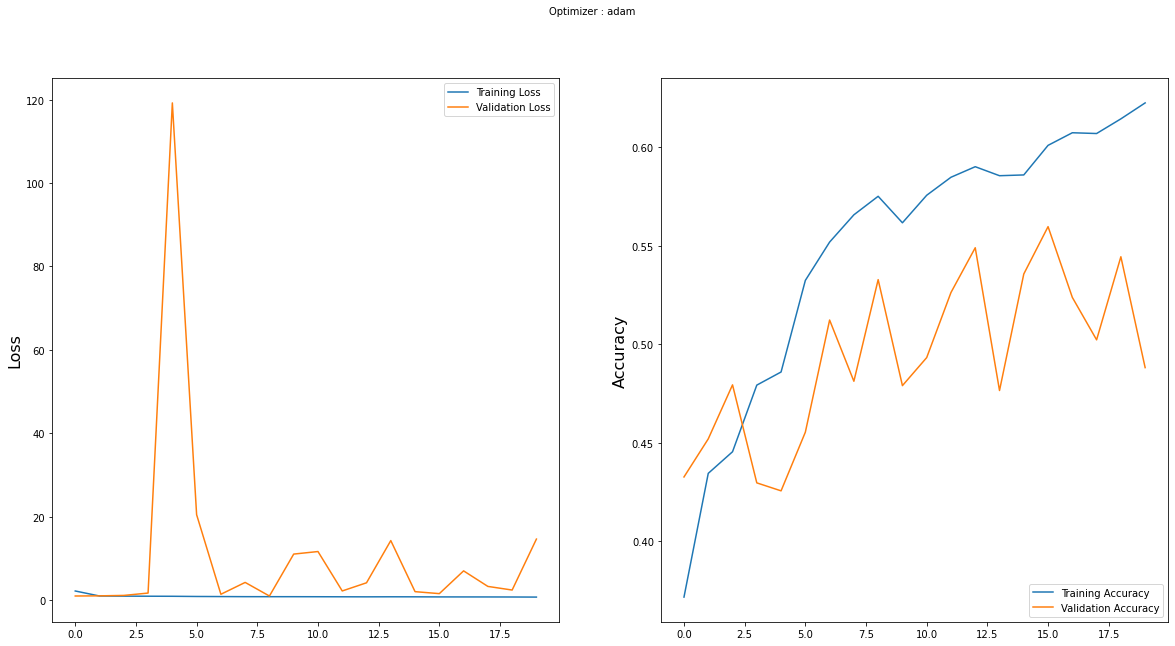

In [ ]:
import matplotlib.pyplot as plt

x=hist6
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# InceptionV3

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

In [ ]:
predictions = Dense(3, activation='softmax')(x2)

# this is the model we will train
model7 = Model(inputs=base_model.input, outputs=predictions)
model7.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy",f1_m,precision_m, recall_m])
model7.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, None, None, 3 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization_4[0][0]      
____________________________________________________________________________________________

In [ ]:
hist7 = model7.fit(train_set, validation_data=train_set, epochs=20,
                   steps_per_epoch=len(train_set), validation_steps=len(train_set))

Epoch 1/20
3830/3830 [==============================] - 172s 44ms/step - loss: 1.2792 - accuracy: 0.3485 - f1_m: 0.2139 - precision_m: 0.2839 - recall_m: 0.1789 - val_loss: 150.7906 - val_accuracy: 0.4148 - val_f1_m: 0.2010 - val_precision_m: 0.2689 - val_recall_m: 0.1670
Epoch 2/20
3830/3830 [==============================] - 168s 44ms/step - loss: 1.1742 - accuracy: 0.3575 - f1_m: 0.1564 - precision_m: 0.2162 - recall_m: 0.1265 - val_loss: 2113.2058 - val_accuracy: 0.3345 - val_f1_m: 0.1689 - val_precision_m: 0.2191 - val_recall_m: 0.1439
Epoch 3/20
3830/3830 [==============================] - 169s 44ms/step - loss: 1.1559 - accuracy: 0.3451 - f1_m: 0.1111 - precision_m: 0.1584 - recall_m: 0.0875 - val_loss: 922.8298 - val_accuracy: 0.3576 - val_f1_m: 0.1223 - val_precision_m: 0.1715 - val_recall_m: 0.0977
Epoch 4/20
3830/3830 [==============================] - 169s 44ms/step - loss: 1.1333 - accuracy: 0.3358 - f1_m: 0.0588 - precision_m: 0.0883 - recall_m: 0.0441 - val_loss: 112.392

In [ ]:
dl_acc = hist7.history["accuracy"][19]
dl_prec = hist7.history["precision_m"][19]
dl_rec = hist7.history["recall_m"][19]
dl_f1 = hist7.history["f1_m"][19]

storeResults('InceptionV3',dl_acc,dl_prec,dl_rec,dl_f1)

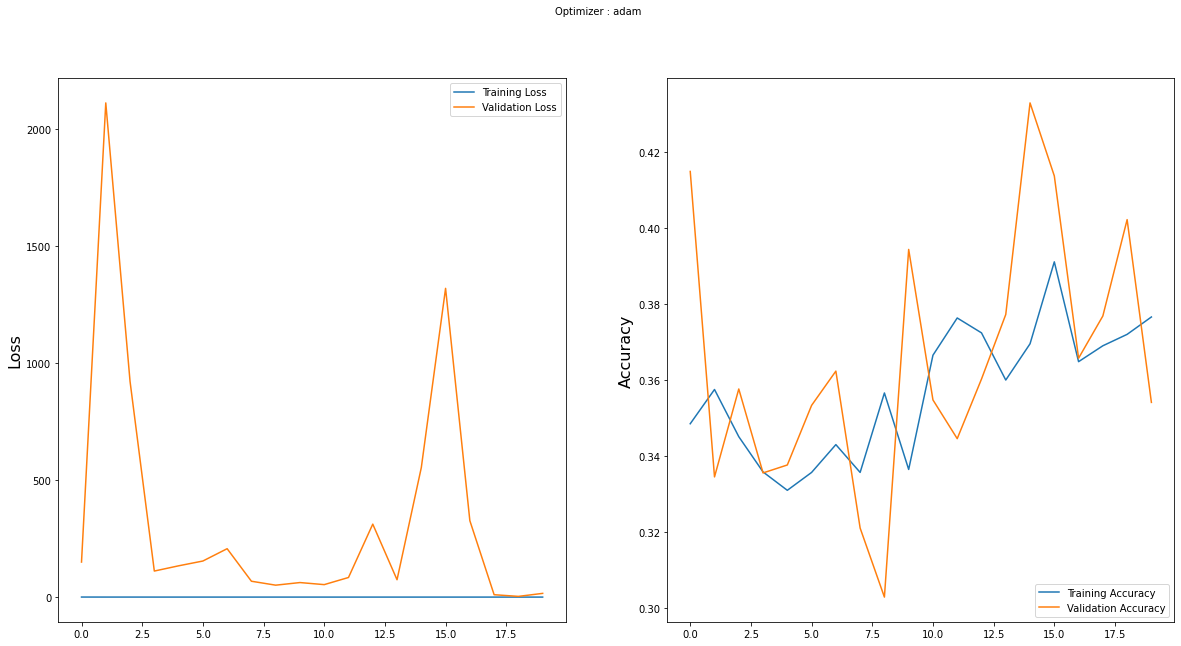

In [ ]:
import matplotlib.pyplot as plt

x=hist7
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Xception

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

In [ ]:
# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(3, activation='softmax')(x)
# Combining base and head
model8 = Model(inputs=base.input, outputs=head)

model8.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=["accuracy",f1_m,precision_m, recall_m])

model8.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
hist8 = model8.fit(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
1206/1206 [==============================] - 33s 28ms/step - loss: 0.0055 - accuracy: 0.9992 - f1_m: 0.9992 - precision_m: 0.9992 - recall_m: 0.9992 - val_loss: 0.3789 - val_accuracy: 0.8901 - val_f1_m: 0.8897 - val_precision_m: 0.8914 - val_recall_m: 0.8889
Epoch 2/20
1206/1206 [==============================] - 33s 27ms/step - loss: 0.0061 - accuracy: 0.9983 - f1_m: 0.9983 - precision_m: 0.9983 - recall_m: 0.9983 - val_loss: 0.0356 - val_accuracy: 0.9871 - val_f1_m: 0.9870 - val_precision_m: 0.9876 - val_recall_m: 0.9867
Epoch 3/20
1206/1206 [==============================] - 33s 27ms/step - loss: 0.0040 - accuracy: 0.9996 - f1_m: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - val_loss: 0.0527 - val_accuracy: 0.9809 - val_f1_m: 0.9809 - val_precision_m: 0.9809 - val_recall_m: 0.9809
Epoch 4/20
1206/1206 [==============================] - 33s 28ms/step - loss: 0.0020 - accuracy: 0.9996 - f1_m: 0.9996 - precision_m: 0.9996 - recall_m: 0.9996 - val_loss: 0.0581 - val_accur

In [ ]:
dl_acc = hist8.history["accuracy"][19]
dl_prec = hist8.history["precision_m"][19]
dl_rec = hist8.history["recall_m"][19]
dl_f1 = hist8.history["f1_m"][19]

storeResults('Xception',dl_acc,dl_prec,dl_rec,dl_f1)

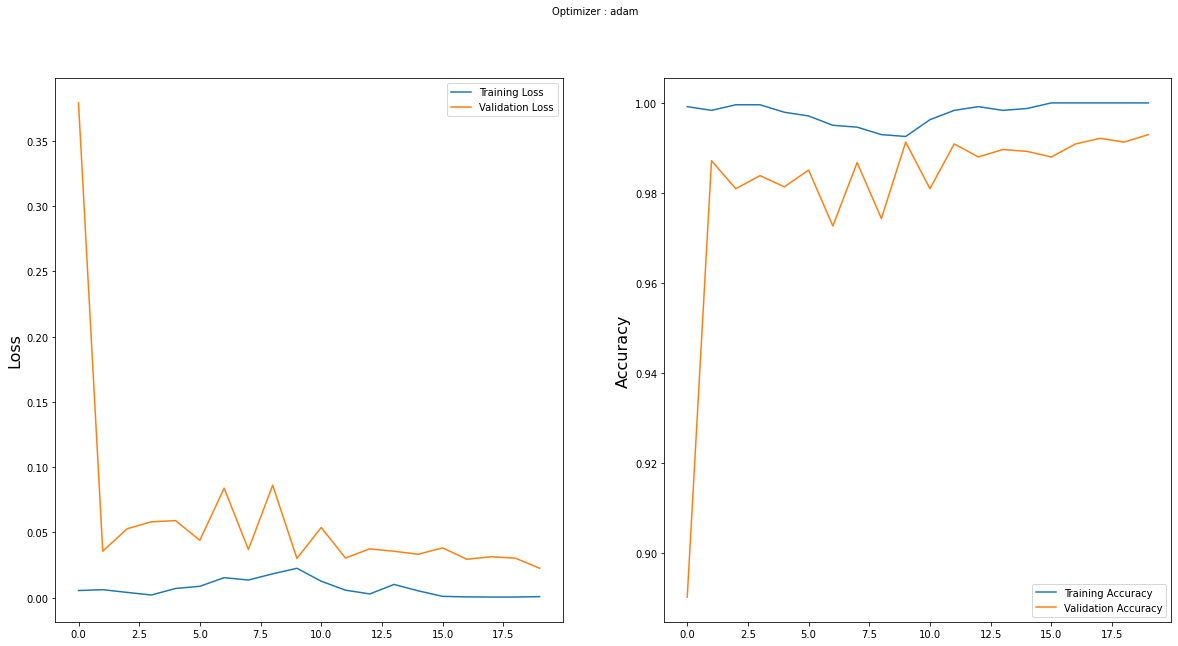

In [ ]:
import matplotlib.pyplot as plt

x=hist8
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Comparison

In [4]:
result


,Model,Accuracy,Precision,Recall,F1-Score
0,EfficientNetB0,0.829,0.835,0.823,0.827
1,VGG16,0.345,0.345,0.345,0.345
2,ResNet50,0.564,0.564,0.564,0.564
3,VGG19,0.335,0.335,0.335,0.335
4,CYENET (CNN-Modified),0.536,0.536,0.536,0.536
5,DenseNEt,0.488,0.488,0.488,0.488
6,InceptionV3,0.354,0.354,0.354,0.354
7,Xception,0.993,0.993,0.993,0.993


# Modelling

In [ ]:
model8.save('model.h5')

In [ ]:
import pickle
pickle.dump(eclf1,open('model.pkl','wb'))

# Graph

In [17]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

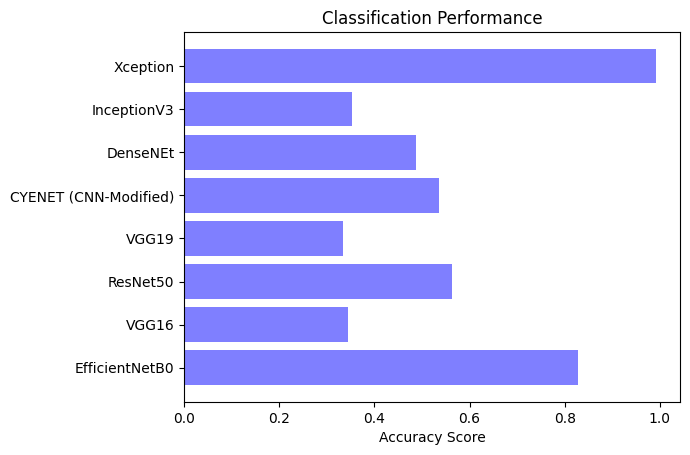

In [13]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

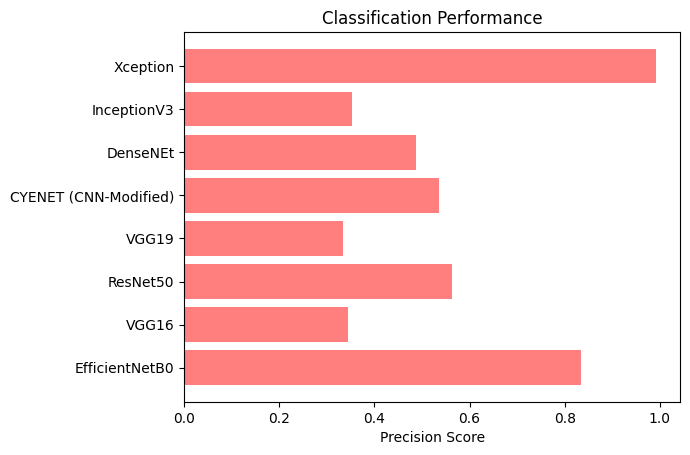

In [14]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

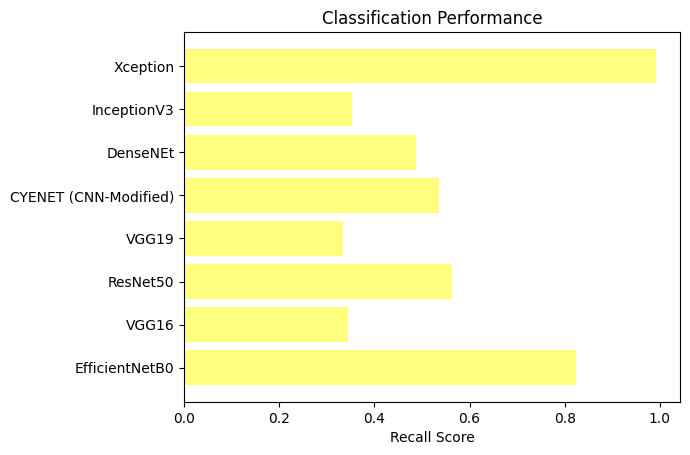

In [15]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

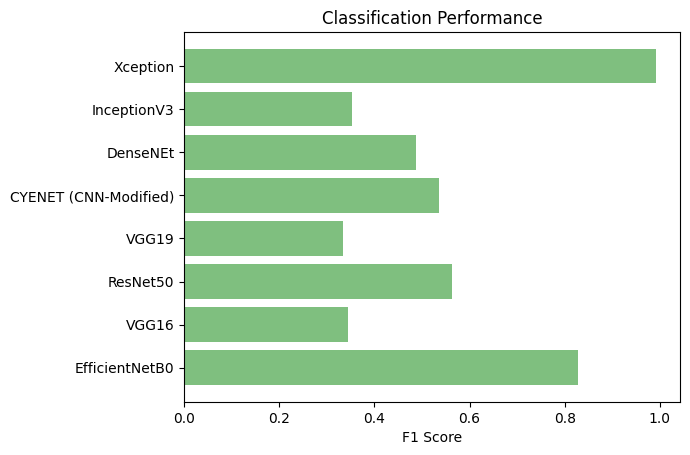

In [16]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()